# Word2Vec
here I implement word2vec with very simple example using tensorflow  
word2vec is vector representation for words with similarity

# Collect Data
we will use only 10 sentences to create word vectors

In [1]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

# Remove stop words
In order for efficiency of creating word vector, we will remove commonly used words

In [2]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [3]:
corpus = remove_stop_words(corpus)

In [4]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

here we have word set by which we will have word vector

In [5]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

# data generation
we will generate label for each word using skip gram.  

In [6]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [7]:
import pandas as pd
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [8]:
df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [9]:
df.shape

(52, 2)

In [10]:
word2int

{'boy': 3,
 'girl': 8,
 'king': 0,
 'man': 11,
 'pretty': 7,
 'prince': 10,
 'princess': 6,
 'queen': 4,
 'strong': 9,
 'wise': 2,
 'woman': 1,
 'young': 5}

# Define Tensorflow Graph

In [11]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    print "{\"" + x + "\", \"" + y + "\"}, "
    #print x, word2int[x], to_one_hot_encoding(word2int[x])
    #print y, word2int[y], to_one_hot_encoding(word2int[y])
    #print "--------------------------------"
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

{"king", "strong"}, 
{"king", "man"}, 
{"strong", "king"}, 
{"strong", "man"}, 
{"man", "king"}, 
{"man", "strong"}, 
{"queen", "wise"}, 
{"queen", "woman"}, 
{"wise", "queen"}, 
{"wise", "woman"}, 
{"woman", "queen"}, 
{"woman", "wise"}, 
{"boy", "young"}, 
{"boy", "man"}, 
{"young", "boy"}, 
{"young", "man"}, 
{"man", "boy"}, 
{"man", "young"}, 
{"girl", "young"}, 
{"girl", "woman"}, 
{"young", "girl"}, 
{"young", "woman"}, 
{"woman", "girl"}, 
{"woman", "young"}, 
{"prince", "young"}, 
{"prince", "king"}, 
{"young", "prince"}, 
{"young", "king"}, 
{"king", "prince"}, 
{"king", "young"}, 
{"princess", "young"}, 
{"princess", "queen"}, 
{"young", "princess"}, 
{"young", "queen"}, 
{"queen", "princess"}, 
{"queen", "young"}, 
{"man", "strong"}, 
{"strong", "man"}, 
{"woman", "pretty"}, 
{"pretty", "woman"}, 
{"prince", "boy"}, 
{"prince", "king"}, 
{"boy", "prince"}, 
{"boy", "king"}, 
{"king", "prince"}, 
{"king", "boy"}, 
{"princess", "girl"}, 
{"princess", "queen"}, 
{"girl", "princ

In [12]:
# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

print X_train
print Y_train

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.

In [13]:
# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

print ONE_HOT_DIM
print x.shape
print y_label
# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

print hidden_layer.shape


# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))


print loss
# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

12
(?, 12)
Tensor("Placeholder_1:0", shape=(?, 12), dtype=float32)
(?, 2)
Tensor("Mean:0", shape=(), dtype=float32)


# Train

In [14]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 40000
vectors = sess.run(b1)
print(vectors)
vectors = sess.run(W1)
print(vectors)
    
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})

    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

[0.9929936]
[[-1.4802796   0.15112314]
 [ 1.3338461  -0.49326912]
 [ 0.5550914  -0.2848338 ]
 [ 0.210275    0.70763737]
 [-0.13345762 -1.7440417 ]
 [ 1.1965036  -1.8461531 ]
 [ 2.4143093  -1.000317  ]
 [-1.675049    0.8652733 ]
 [ 0.9013713   0.79454577]
 [ 0.44831207  0.5106683 ]
 [ 0.25280872  1.1923499 ]
 [ 1.2894003   0.64921486]]
('iteration 0 loss is : ', 3.429049)
('iteration 3000 loss is : ', 1.8469862)
('iteration 6000 loss is : ', 1.7803186)
('iteration 9000 loss is : ', 1.7491246)
('iteration 12000 loss is : ', 1.7285994)
('iteration 15000 loss is : ', 1.7168013)
('iteration 18000 loss is : ', 1.7092603)
('iteration 21000 loss is : ', 1.7035094)
('iteration 24000 loss is : ', 1.6987923)
('iteration 27000 loss is : ', 1.6947675)
('iteration 30000 loss is : ', 1.6912434)
('iteration 33000 loss is : ', 1.6881057)
('iteration 36000 loss is : ', 1.6852797)
('iteration 39000 loss is : ', 1.6827132)


In [15]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(b1)
print(vectors)
vectors = sess.run(W1)
print(vectors)
vectors = sess.run(W1+b1)
print(vectors)
print hidden_layer.shape


[1.5094281]
[[-1.2285161  -0.6267361 ]
 [-1.2727653  -1.8133893 ]
 [ 5.072935   -4.2561855 ]
 [-1.0526576  -0.14354265]
 [-0.7447506  -2.0368452 ]
 [-1.4453822  -1.3607126 ]
 [ 4.812353   -2.055343  ]
 [ 3.2475069  -5.134308  ]
 [ 0.1999776  -2.0853264 ]
 [ 1.0683353   6.182065  ]
 [ 2.2479002   5.2398214 ]
 [ 0.6121856   1.9054925 ]]
[[ 0.28091204  0.88269204]
 [ 0.23666286 -0.30396116]
 [ 6.582363   -2.7467575 ]
 [ 0.45677054  1.3658855 ]
 [ 0.7646775  -0.52741706]
 [ 0.06404591  0.1487155 ]
 [ 6.321781   -0.54591477]
 [ 4.756935   -3.6248798 ]
 [ 1.7094058  -0.5758983 ]
 [ 2.5777636   7.691493  ]
 [ 3.7573285   6.7492495 ]
 [ 2.1216137   3.4149208 ]]
(?, 2)


# word vector in table

In [18]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,king,0.280912,0.882692
1,woman,0.236663,-0.303961
2,wise,6.582363,-2.746758
3,boy,0.456771,1.365885
4,queen,0.764678,-0.527417
5,young,0.064046,0.148715
6,princess,6.321781,-0.545915
7,pretty,4.756935,-3.624880
8,girl,1.709406,-0.575898
9,strong,2.577764,7.691493


# word vector in 2d chart

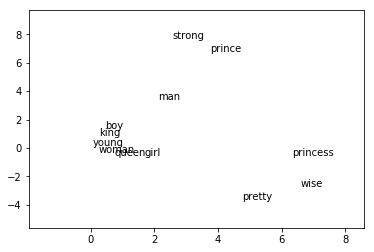

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 2.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()